In [1]:
import numpy as np  # Import the NumPy library for numerical operations.
import pandas as pd  #  Import the pandas library for data manipulation and analysis.
import seaborn as sns  # Import the seaborn library for data visualization.
import matplotlib.pyplot as plt # Import the matplotlib library for creating static, interactive, and animated visualizations.
import warnings  # Import the warnings library to handle warning messages.
warnings.filterwarnings("ignore")  # Ignore warning messages to keep the output clean.


Read data from csv file and display it in dataframe format.

In [2]:
df = pd.read_csv('train.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


drop unnecessary columns 

In [3]:
df.drop(['PassengerId','Name','Ticket'] , axis=1, inplace=True)  # Drop the specified columns from the DataFrame
df.head()  # Display the first few rows of the DataFrame after dropping the specified columns

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,male,22.0,1,0,7.2500,NaN,S
1,1,1,female,38.0,1,0,71.2833,C85,C
2,1,3,female,26.0,0,0,7.9250,NaN,S
3,1,1,female,35.0,1,0,53.1000,C123,S
4,0,3,male,35.0,0,0,8.0500,NaN,S


Data types 

In [4]:
df.dtypes  # Display the data types of each column in the DataFrame

Survived      int64
Pclass        int64
Sex          object
Age         float64
SibSp         int64
Parch         int64
Fare        float64
Cabin        object
Embarked     object
dtype: object

unique values

In [5]:
dtypes = df.dtypes  # Store the data types of each column in a variable
n_uniq = df.nunique()  # Count the number of unique values in each column
n_uniq  # Display the number of unique values in each column

Survived      2
Pclass        3
Sex           2
Age          88
SibSp         7
Parch         7
Fare        248
Cabin       147
Embarked      3
dtype: int64

In [6]:
dtypes = df.dtypes  # Store the data types of each column in a variable
n_uniq = df.nunique()  # Count the number of unique values in each column
pd.DataFrame({'dtypes': dtypes, 'n_uniq': n_uniq}) .T  # Create a new DataFrame with the data types and number of unique values of each column

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
dtypes,int64,int64,object,float64,int64,int64,float64,object,object
n_uniq,2,3,2,88,7,7,248,147,3


In [7]:
def dtypes_and_unique(df):
    dtypes = df.dtypes  # Store the data types of each column in a variable
    n_uniq = df.nunique()  # Count the number of unique values in each column
    
    return pd.DataFrame({'dtypes': dtypes, 'n_uniq': n_uniq}) .T  # Create a new DataFrame with the data types and number of unique values of each column

In [8]:
dtypes_and_unique(df)  # Call the function to get the data types and number of unique values of each column in the DataFrame

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
dtypes,int64,int64,object,float64,int64,int64,float64,object,object
n_uniq,2,3,2,88,7,7,248,147,3


In [9]:
from preprocess import dtypes_and_unique  # Import the dtypes_and_unique function from the preprocessing module

dtypes_and_unique(df)  # Call the function to get the data types and number of unique values of each column in the DataFrame

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
dtypes,int64,int64,object,float64,int64,int64,float64,object,object
n_uniq,2,3,2,88,7,7,248,147,3


In [10]:
cols = ['Survived', 'Pclass', 'Sex', 'SibSp','Parch','Embarked' ]   # List of columns to be converted to categorical data type
df[cols] = df[cols].astype('category')  # Convert the specified columns to categorical data type
pd.DataFrame(df.dtypes) .T # Display the data types of all columns in the DataFrame

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,category,category,category,float64,category,category,float64,object,category


In [11]:
null = df. isnull()
null

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False
888,False,False,False,True,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False


In [12]:
null = df. isnull() 
null.sum()   # Count the number of null values in each column of the DataFrame

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Cabin       687
Embarked      2
dtype: int64

In [13]:
null = df. isnull() .sum()  # Count the number of null values in each column of the DataFrame
ratio = (null/ df.shape[0]) *100

pd.DataFrame({'null': null, 'ratio': ratio}) .T # Create a new DataFrame with the count and ratio of null values in each column

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
null,0.0,0.0,0.0,177.00000,0.0,0.0,0.0,687.000000,2.000000
ratio,0.0,0.0,0.0,19.86532,0.0,0.0,0.0,77.104377,0.224467


In [14]:
from preprocess import is_null  # Import the is_null function from the preprocessing module

is_null(df)  # Call the is_null function to get the count and ratio of null values in each column of the DataFrame

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
null,0.0,0.0,0.0,177.00000,0.0,0.0,0.0,687.000000,2.000000
ratio,0.0,0.0,0.0,19.86532,0.0,0.0,0.0,77.104377,0.224467


In [15]:
df.head()  # Display the first few rows of the DataFrame

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,male,22.0,1,0,7.2500,NaN,S
1,1,1,female,38.0,1,0,71.2833,C85,C
2,1,3,female,26.0,0,0,7.9250,NaN,S
3,1,1,female,35.0,1,0,53.1000,C123,S
4,0,3,male,35.0,0,0,8.0500,NaN,S


In [16]:
df1 = df.dropna(subset=["Embarked"], inplace= True)
df.head()
#df2 = df.drop("Cabin", axis=1, inplace=True)
#df2.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,male,22.0,1,0,7.2500,NaN,S
1,1,1,female,38.0,1,0,71.2833,C85,C
2,1,3,female,26.0,0,0,7.9250,NaN,S
3,1,1,female,35.0,1,0,53.1000,C123,S
4,0,3,male,35.0,0,0,8.0500,NaN,S


In [17]:
median = df['Age'].median()  # Calculate the median of the 'Age' column
df['Age'].fillna(median, inplace=True)  # Fill null values in the 'Age' column with the calculated median value
df .Age  # Display the first few rows of the 'Age' column after filling null values with the median

0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
886    27.0
887    19.0
888    28.0
889    26.0
890    32.0
Name: Age, Length: 889, dtype: float64

In [18]:
num_cols =df.select_dtypes('number').columns  # Select all numeric columns in the DataFrame
num_cols  # Display the names of all numeric columns in the DataFrame

Index(['Age', 'Fare'], dtype='object')

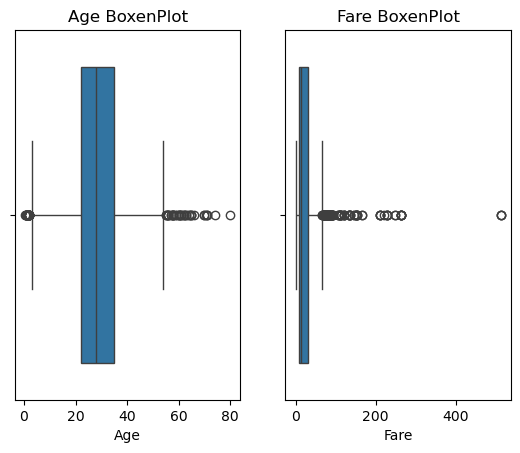

In [19]:
plt.Figure(figsize=(8, 1)) # Create a new figure with a specified size
for i ,col in enumerate(num_cols): # Iterate over the numeric columns in the DataFrame
    plt.subplot(1, 2, i+1) # Create a subplot for each numeric column
    sns.boxplot(df[col], orient='h')  # Create a horizontal boxen plot for each numeric column in the DataFrame
    plt.title(f"{col} BoxenPlot")  # Set the title of each subplot to the name of the column

In [20]:
for col in num_cols:
    Q1 = df[col].quantile(0.25)  # Calculate the first quartile (Q1) of the column
    Q3 = df[col].quantile(0.75)  # Calculate the third quartile (Q3) of the column
    IQR = Q3 - Q1  # Calculate the interquartile range (IQR) of the column

    lower_Fance = Q1 - 1.5 * IQR  # Calculate the lower Fance for outliers
    upper_Fance = Q3 + 1.5 * IQR  # Calculate the upper Fance for outliers
    Lower_outliers = df[df[col] <lower_Fance][col].values
    upper_outliers = df[df[col] >upper_Fance][col].values

    df[col].replace(Lower_outliers, lower_Fance, inplace=True)  # Replace lower outliers with the lower Fance value
    df[col].replace(upper_outliers, upper_Fance, inplace=True)  # Replace upper outliers with the upper Fance value

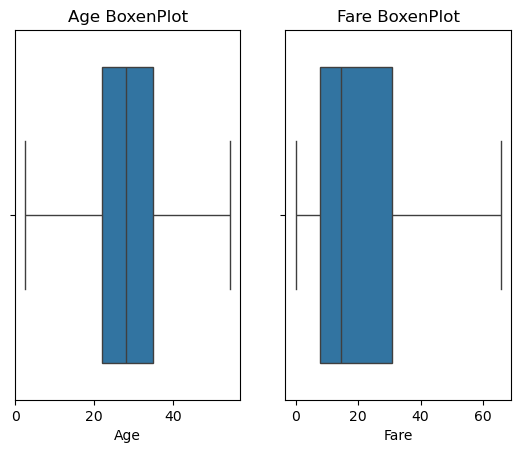

In [21]:
plt.Figure(figsize=(8, 1)) # Create a new figure with a specified size
for i ,col in enumerate(num_cols): # Iterate over the numeric columns in the DataFrame
    plt.subplot(1, 2, i+1) # Create a subplot for each numeric column
    sns.boxplot(df[col], orient='h')  # Create a horizontal boxen plot for each numeric column in the DataFrame
    plt.title(f"{col} BoxenPlot")  # Set the title of each subplot to the name of the column

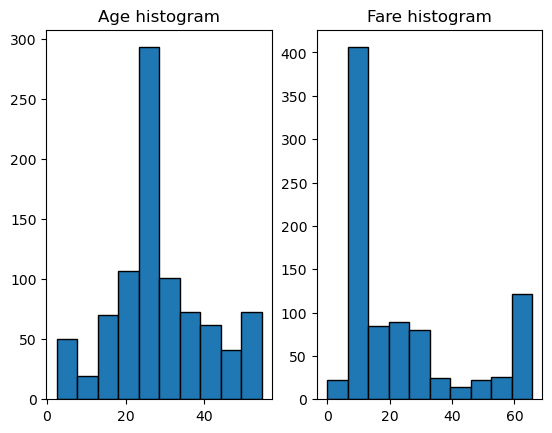

In [22]:
plt.Figure(figsize=(9, 2)) # Create a figure with two subplots
for i ,col in enumerate(num_cols): # Iterate over the numeric columns in the DataFrame
    plt.subplot(1, 2, i+1) # Create a subplot for each numeric column
    plt.hist(df[col], edgecolor='black')  # Create a histogram for each numeric column in the DataFrame
    plt.title(f"{col} histogram")  # Set the title of each subplot to the name of the column

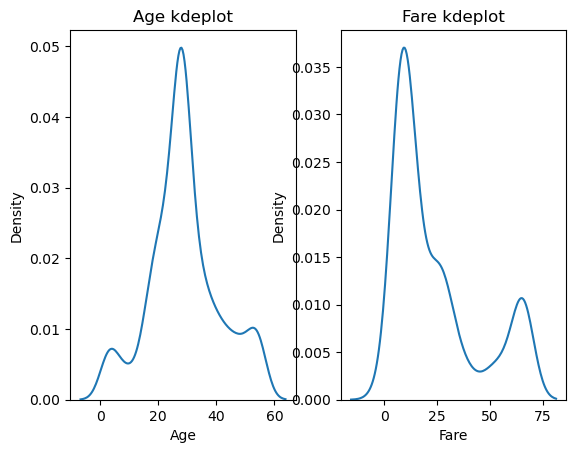

In [23]:
plt.Figure(figsize=(9, 2)) # Create a new figure with a specified size
for i ,col in enumerate(num_cols): # Iterate over the numeric columns in the DataFrame
    plt.subplot(1, 2, i+1) # Create a subplot for each numeric column
    sns.kdeplot(df[col])  # Create a horizontal boxen plot for each numeric column in the DataFrame
    plt.title(f"{col} kdeplot")  # Set the title of each subplot to the name of the column

In [24]:
Cat_cols =df.select_dtypes('category').columns  #   Select all categorical columns in the DataFrame
Cat_cols  # Display the list of numeric column names

Index(['Survived', 'Pclass', 'Sex', 'SibSp', 'Parch', 'Embarked'], dtype='object')

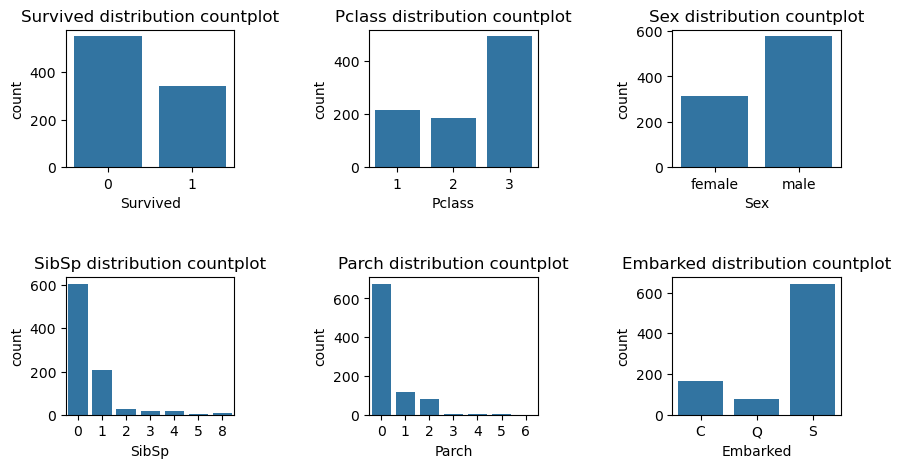

In [25]:
plt.figure(figsize=(10, 5))  # Create a new figure with a specified size
for i ,col in enumerate(Cat_cols): # Iterate over the categorical columns in the DataFrame
    plt.subplot(2, 3, i+1) # Create a subplot for each categorical column
    sns.countplot(x = col,data=df)  # Create a count plot for each categorical column in the DataFrame
    plt.title(f"{col} distribution countplot")  # Set the title of each subplot to the name of the columnts

plt.subplots_adjust(wspace=0.8, hspace=0.8)  # Adjust the spacing between subplots
plt.show()  # Display all the subplots together

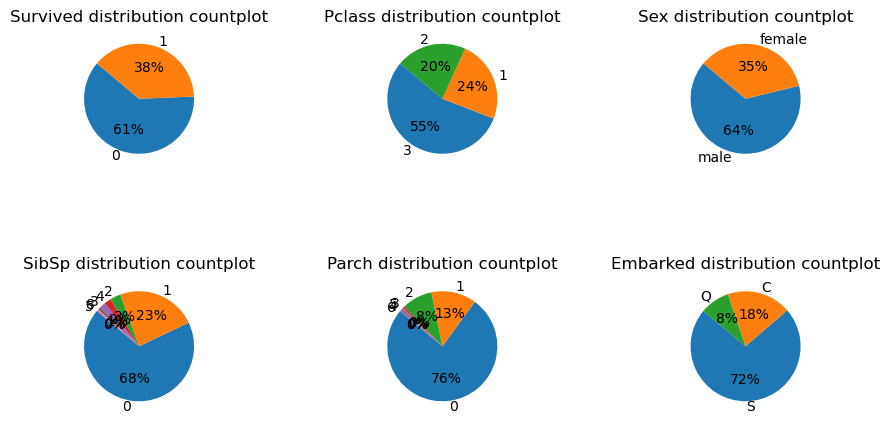

In [26]:
plt.figure(figsize=(10, 5))  # Create a new figure with a specified size
for i ,col in enumerate(Cat_cols): # Iterate over the categorical columns in the DataFrame
    plt.subplot(2, 3, i+1) # Create a subplot for each categorical column
    unique = df[col].value_counts()  # Count the occurrences of each unique value in the categorical column
    count = unique.values  # Get the count of each unique value in the categorical column
    categories = unique.index  # Get the unique categories in the categorical column
    plt.pie(count, labels=categories, startangle=140 , autopct='%1.1d%%')  # Create a pie chart for each categorical column in the DataFrame
    plt.title(f"{col} distribution countplot")  # Set the title of each subplot to the name of the columnts
plt.subplots_adjust(wspace=0.8, hspace=0.8)  # Adjust the spacing between subplots
plt.show()  # Display all the subplots together

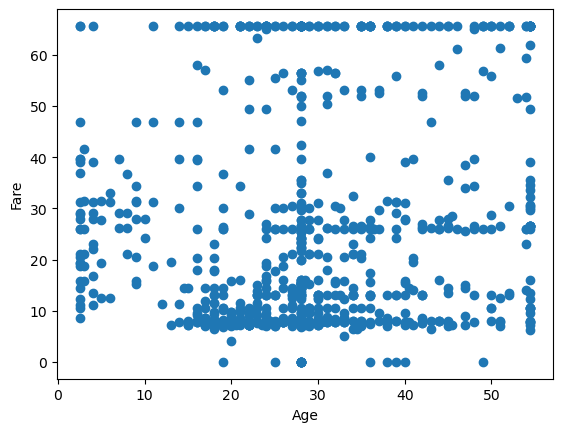

In [27]:
plt.Figure(figsize=(2, 2))  # Create a new figure with a specified size
plt.scatter(df['Age'], df['Fare'])  # Create a scatter plot of the 'Age' and 'Fare' columns in the DataFrame
plt.xlabel('Age')  # Set the x-axis label to 'Age'
plt.ylabel('Fare')  # Set the y-axis label to 'Fare'
plt.show()  # Display the scatter plot

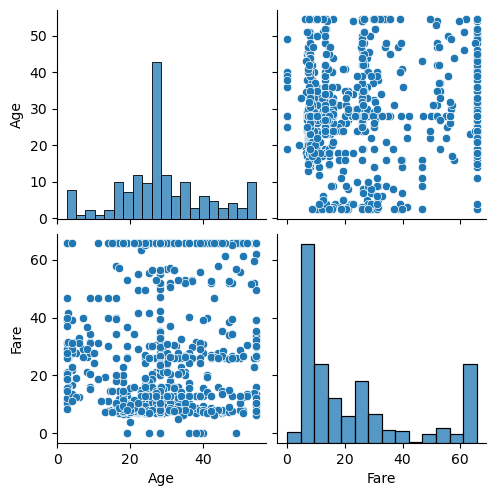

In [28]:
sns.pairplot(df)

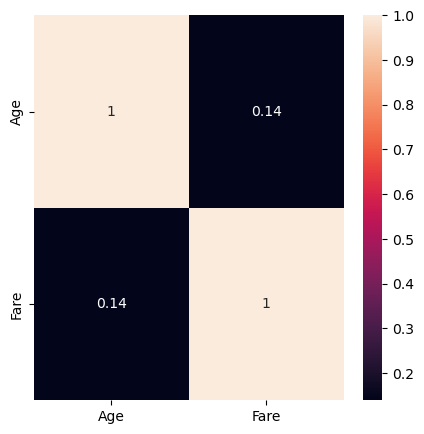

In [29]:
corr = df[['Age','Fare']].corr()  # Calculate the correlation matrix of the DataFrame
plt.figure(figsize=(5, 5))  # Create a new figure with a specified size
sns.heatmap(corr, annot=True )  # Create a heatmap of the correlation matrix with annotations and a specified color map
plt.show()  # Display the heatmap

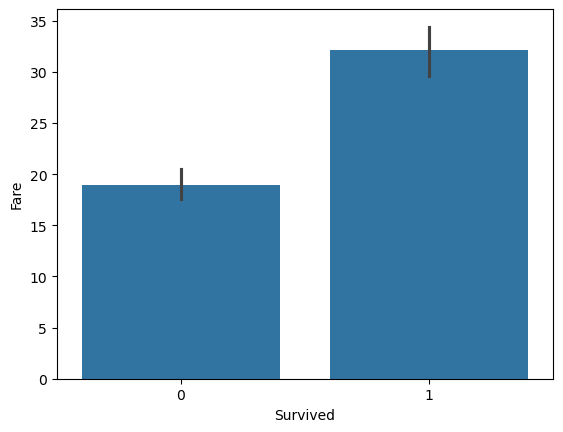

In [30]:
plt.Figure(figsize=(2, 2))  # Create a new figure with a specified size
sns.barplot(x='Survived', y='Fare', data=df)  # Create a bar plot showing the average fare for each survival status in the DataFrame
plt.show()  # Display the bar plot

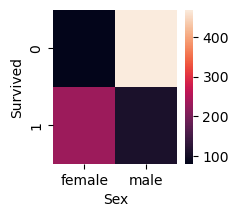

In [31]:
plt.figure(figsize=(2, 2))  # Create a new figure with a specified size
agg = df.pivot_table(index='Survived', columns='Sex', values='Age', aggfunc= len)  # Create a pivot table showing the average fare for each survival status and sex in the DataFrame
sns.heatmap(agg) # Create a heatmap of the pivot table with annotations and a specified color map
plt.show()  # Display the heatmap

In [32]:
df.duplicated().sum()  # Check if there are any duplicate rows in the DataFrame and count them
df.drop_duplicates(inplace=True)  # Drop duplicate rows from the DataFrame

In [33]:
df.head()  # Display the first few rows of the DataFrame

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,male,22.0,1,0,7.2500,NaN,S
1,1,1,female,38.0,1,0,65.6563,C85,C
2,1,3,female,26.0,0,0,7.9250,NaN,S
3,1,1,female,35.0,1,0,53.1000,C123,S
4,0,3,male,35.0,0,0,8.0500,NaN,S


In [34]:
df.drop('Cabin' , axis=1, inplace=True)  # Drop the 'Cabin' column from the DataFrame
df.head()  # Display the first few rows of the DataFrame after dropping the 'Cab

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,65.6563,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [35]:
X = df.iloc[:, 1:]  # Select all columns except the first column (index 0) from the DataFrame
y = df['Survived']  # Create a new Series containing only the 'Survived' column from the DataFrame

In [36]:
X.head()  # Display the first few rows of the DataFrame containing all columns except 'Survived'

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,22.0,1,0,7.2500,S
1,1,female,38.0,1,0,65.6563,C
2,3,female,26.0,0,0,7.9250,S
3,1,female,35.0,1,0,53.1000,S
4,3,male,35.0,0,0,8.0500,S


In [37]:
y.T

0      0
1      1
2      1
3      1
4      0
      ..
885    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 773, dtype: category
Categories (2, int64): [0, 1]

In [38]:
from sklearn.preprocessing import MinMaxScaler  # Import the MinMaxScaler class from the scikit-learn library
scaler = MinMaxScaler()  # Create a new instance of the MinMaxScaler class

In [39]:
num_cols = X.select_dtypes('number').columns  # Select all numeric columns in the DataFrame
scaler.fit(X[num_cols])  # Fit the scaler to the numeric columns in the DataFrame
X[num_cols] = scaler.transform(X[num_cols])  # Transform the numeric columns in the DataFrame using the fitted scaler
X.head()  # Display the first few rows of the DataFrame after scaling the numeric columns

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,0.375000,1,0,0.110424,S
1,1,female,0.682692,1,0,1.000000,C
2,3,female,0.451923,0,0,0.120704,S
3,1,female,0.625000,1,0,0.808757,S
4,3,male,0.625000,0,0,0.122608,S


In [40]:
str_col = ['Sex' , 'Embarked']  # Create a list of the string columns in the DataFrame
pd.DataFrame(X[str_col].nunique()).T # Count the number of unique values in each string column in the DataFrame

,Sex,Embarked
0,2,3


In [42]:
from category_encoders import OneHotEncoder  


In [43]:
encoder = OneHotEncoder(cols=str_col , drop_invariant=True)  # Create a new instance of the OneHotEncoder class and specify the string columns to encode 
X = encoder.fit_transform(X)  # Transform the string columns in the DataFrame using the OneHotEncoder

In [44]:
X.head()  # Display the first few rows of the DataFrame after encoding the string columns

,Pclass,Sex_1,Sex_2,Age,SibSp,Parch,Fare,Embarked_1,Embarked_2,Embarked_3
0,3,1,0,0.375000,1,0,0.110424,1,0,0
1,1,0,1,0.682692,1,0,1.000000,0,1,0
2,3,0,1,0.451923,0,0,0.120704,1,0,0
3,1,0,1,0.625000,1,0,0.808757,1,0,0
4,3,1,0,0.625000,0,0,0.122608,1,0,0


In [45]:
X


,Pclass,Sex_1,Sex_2,Age,SibSp,Parch,Fare,Embarked_1,Embarked_2,Embarked_3
0,3,1,0,0.375000,1,0,0.110424,1,0,0
1,1,0,1,0.682692,1,0,1.000000,0,1,0
2,3,0,1,0.451923,0,0,0.120704,1,0,0
3,1,0,1,0.625000,1,0,0.808757,1,0,0
4,3,1,0,0.625000,0,0,0.122608,1,0,0
...,...,...,...,...,...,...,...,...,...,...
885,3,0,1,0.701923,0,5,0.443598,0,0,1
887,1,0,1,0.317308,0,0,0.456925,1,0,0
888,3,0,1,0.490385,1,2,0.357163,1,0,0
889,1,1,0,0.451923,0,0,0.456925,0,1,0
